In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the dataset
from google.colab import files
uploaded = files.upload()  # Upload the Mall_Customers.csv file

# Read the CSV file
data = pd.read_csv("/content/Mall_Customers.csv")

# Display the first few rows
data.head()


Saving Mall_Customers.csv to Mall_Customers (1).csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Display basic info and check for missing values
data.info()
data.isnull().sum()

# Select relevant features (assuming Spending Score and Annual Income are relevant)
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


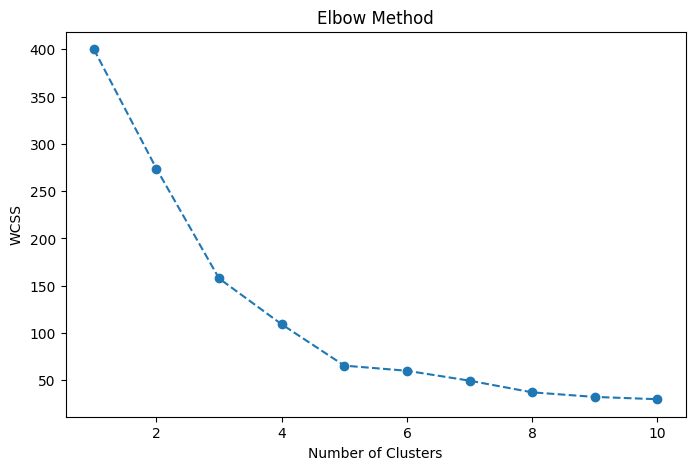

In [4]:
# Elbow method to determine the number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [5]:
# Train the K-means model with the chosen number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


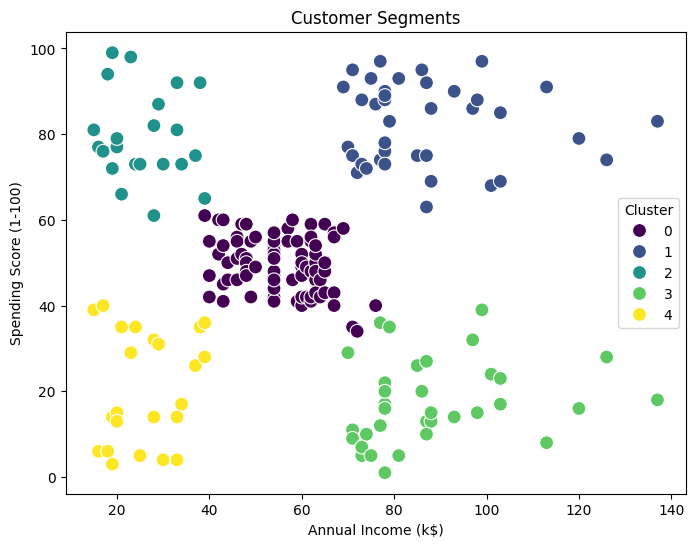

In [6]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features['Annual Income (k$)'], y=features['Spending Score (1-100)'],
                hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


In [8]:
# Include only numeric columns in the groupby operation
numeric_columns = data.select_dtypes(include=np.number).columns
cluster_summary = data.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         86.320988  42.716049           55.296296               49.518519   
1        162.000000  32.692308           86.538462               82.128205   
2         23.090909  25.272727           25.727273               79.363636   
3        164.371429  41.114286           88.200000               17.114286   
4         23.000000  45.217391           26.304348               20.913043   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  
3            3.0  
4            4.0  


In [9]:
# Save the dataset with cluster labels to a new CSV file
output_filename = "Mall_Customers_with_Clusters.csv"
data.to_csv(output_filename, index=False)

# Provide a download link for the file
from google.colab import files
files.download(output_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>